#**Project: Titanic - Machine Learning from Disaster**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('/content/train.csv', index_col='PassengerId')
test_df = pd.read_csv('/content/test.csv', index_col='PassengerId')

In [ ]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Tập test set không có cột 'Survived' vì đây là bộ dữ liệu cần được dự đoán

**- Note**


*   `sibsp`	# of siblings / spouses aboard the Titanic
*   `parch`	# of parents / children aboard the Titanic
*  `ticket`	Ticket number
*  `fare`	Passenger fare
*  `cabin`	Cabin number






In [ ]:
# preview data
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


#**1. Feature Classification: Categorical and Numerical**

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Ta thấy tập **train** có 891 entries (dòng) là 891 mẫu, trong đó cột Age chỉ có 714 giá trị không rỗng, cột Cabin có 204 giá trị không rỗng

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


Tập **test** có 418 mẫu, cột Age và Cabin vẫn thiếu dữ liệu nhiều

Take notes của tập train:
* Categorical: `Pclass`(ordinal: theo thứ tự), `SibSp`, `Parch`, `Sex`, `Survived`
* Numerical: `Age` (continous), `Fare` (discrete)
* Mix type of data: `Ticket`, `Cabin`
* Contain Error/Typo: `Name`
* Blank or Null: `Cabin` > `Age` > `Embarked`
* Various data type: int, float, string

Mặc dù Pclass có giá trị 1, 2, 3 nhưng là phân loại hạng mục của ghế, phân loại này có thứ tự

Theo data dictionary, một hành khách sống sót có giá trị là 1, chết là 0. Đây là dấu hiệu nhận biết sự sống còn của 1 người. Tuy nhiên, trong kiểu dữ liệu lại là int64, chúng ta có thể đổi kiểu dữ liệu bằng hàm astype()

In [ ]:
train_df['Survived'] = train_df['Survived'].astype("category")

In [ ]:
converted_features = ["Pclass", "Sex", "Parch", "SibSp", "Embarked"]
def convert_cat (df, features): # hàm chuyển chuyển kiểu dữ liệu về dạng category
  for feature in features:
    df[feature] = df[feature].astype("category")

convert_cat(train_df, converted_features)

In [ ]:
train_df.Pclass

PassengerId
1      3
2      1
3      3
4      1
5      3
      ..
887    2
888    1
889    3
890    1
891    3
Name: Pclass, Length: 891, dtype: category
Categories (3, int64): [1, 2, 3]

## Phân bố của numerical feature trên toàn bộ dữ liệu
Distribution of numerical feature values across the samples


In [ ]:
train_df.describe() # hàm describe trả về các cột numerical feature

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


## Phân bố của categorical feature trên toàn bộ dữ liệu
Distribution of categorical feature values across the samples

In [ ]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


Từ bảng trên, ta biết được:


*   `Survived` có 891 mẫu, đầy đủ, không thiếu. giá trị unique là 2 (0: chết, 1: sống). Giá trị top là 0, nghĩa là nhiều người chết trong chuyến tàu đó và freq 549 là có 549 người chết.
*   `Sex` count: 891 có 891 giá trị, giá trị unique = 2 là male và female, top là male là 577 người nam



#**2. Exploratory Data Analysis (EDA): Phân tích khai phá dữ liệu**

## **Correlating categorical features**
* Categorical: `Pclass`(ordinal: theo thứ tự), `SibSp`, `Parch`, `Sex`,

## **Target variable**: `Survived`

In [ ]:
train_df["Survived"].value_counts().to_frame()

# có 549 người mất, 342 người sống

,Survived
0,549
1,342


In [ ]:
# thêm normalize=True để biểu hiện %
train_df["Survived"].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


38% người sống trên chuyến tàu, training data bị mất cân bằng dữ liệu nhưng không đáng kể

### `Sex`

In [ ]:
train_df["Sex"].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


Số lượng nam gần gấp đôi số lượng nữ

<Axes: xlabel='Sex', ylabel='count'>

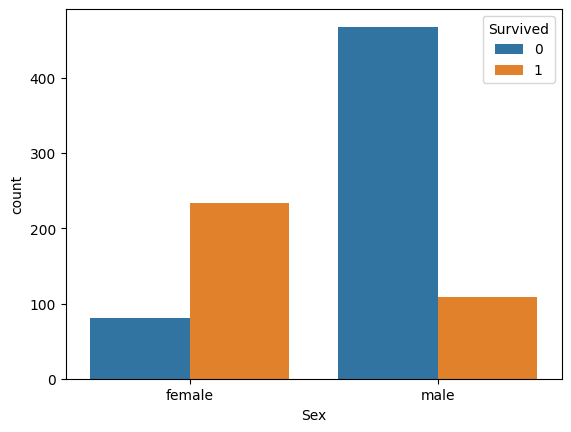

In [ ]:
# dùng sns.countplot để trực quan hóa dữ liệu

sns.countplot(data=train_df, x='Sex', hue="Survived")

Ta thấy được, tỉ lệ sống của nữ nhiều hơn của nam, điều đó có nghĩa là khi gặp nạn, thì người ta sẽ chủ động lady first.

* **remmaining categorical feature columns**: các cột phân loại còn lại

In [ ]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

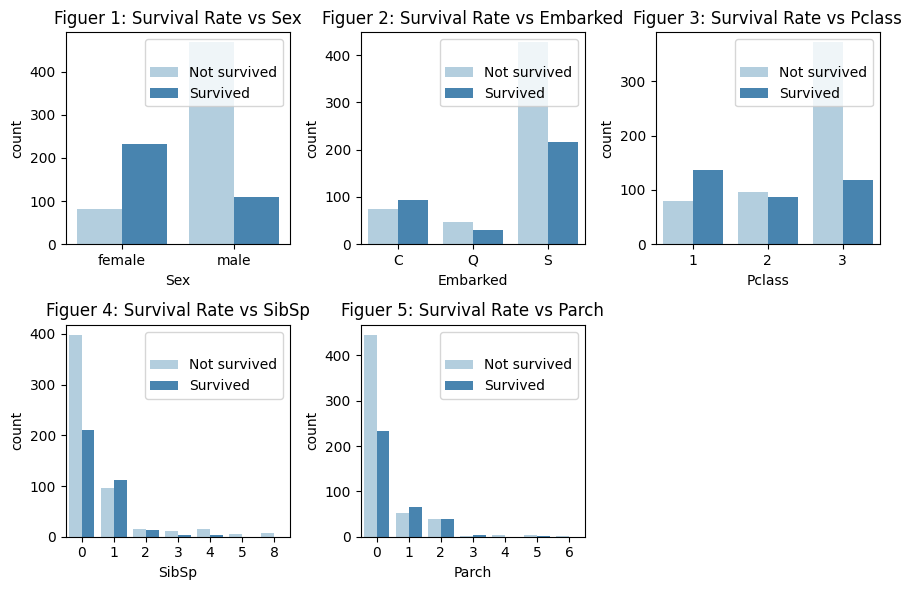

In [ ]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp',  'Parch']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_rows*4.5, n_cols*2))

for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols + c #index to loop through list 'cols' - đánh dấu chỉ mục của danh sách 'cols'
    if i < len(cols):
      ax_i = ax[r,c]
      sns.countplot(data=train_df, x=cols[i], hue="Survived", palette="Blues", ax=ax_i)
      ax_i.set_title(f"Figuer {i + 1}: Survival Rate vs {cols[i]}")
      ax_i.legend(title=" ", loc='upper right', labels=['Not survived', 'Survived'])

ax.flat[-1].set_visible(False) # xóa biểu đồ con cuối cùng
plt.tight_layout() # chỉnh sửa các biểu đồ rời nhau
plt.show()

Observation
- Tỉ lệ sống sót thông qua các biểu đồ:
** Figure 1: những người phụ nữ có khả năng sống sót nhiều hơn nam
** Figure 2: Đa số mọi người đều lên cảng S (Southampton) và khả năng sống sót không cao.
** Figure 3: những người đi hạng thương gia thì tỉ lệ sống còn nhiều
** Figure 4: Những hàng khách chỉ đi chung với 1 người anh em thì khả năng sống sót cao, còn đi một mình thì chết rất nhiều.
** Figure 5: Những người đi chung với 1-2 cha/mẹ thì có cơ hội sống nhiều hơn.




Ta thấy được fig SibSp và Parch tương đối giống nhau, mình sẽ kết hợp lại để giảm độ phức tạp cho mô hình.

## EDA for Numerical Features

*   Numerical Features: (continuous) `Age`, `Fare`



### Age

<Axes: xlabel='Age', ylabel='Count'>

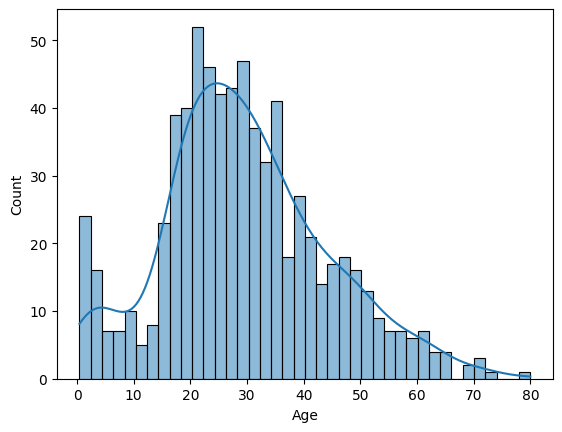

In [ ]:
sns.histplot(data=train_df, x='Age', bins=40, kde=True)

Độ tuổi đi du lịch nhiều nhất là khoảng từ 20 đến 30 tuổi

<Axes: xlabel='Age', ylabel='Count'>

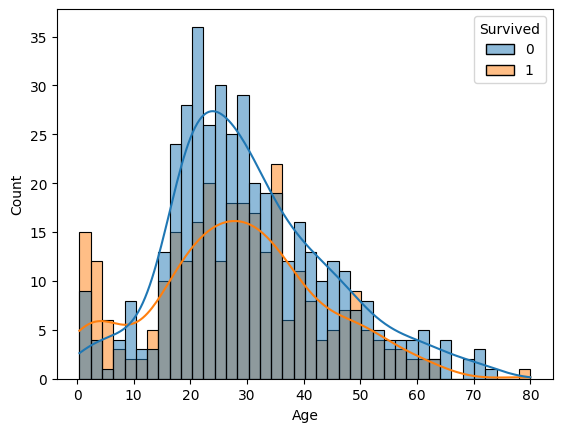

In [ ]:
# liên kết age với Survived
sns.histplot(data=train_df, x ='Age', hue="Survived", bins=40, kde=True)

Từ biểu đồ, các trẻ nhỏ từ **0 đến 8 tuổi** được bảo vệ và **sống** sót cao, các hành khách từ **20 đến khoảng 38 tuổi** thì khả năng **sống** cao hơn các độ tuổi còn lại.

##Fare

In [ ]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


*   Mọi hành khách đều trả tiền vé, vé rẻ nhất là 0 đô (có thể là thủy thủ, thuyền trưởng nên được miễn phí.
*   Giá vé trung bình là khoảng 32 đô
*   50% giá vé là 14 đô
*   Giá vé mắc nhất là 512 đô



<Axes: xlabel='Fare', ylabel='Count'>

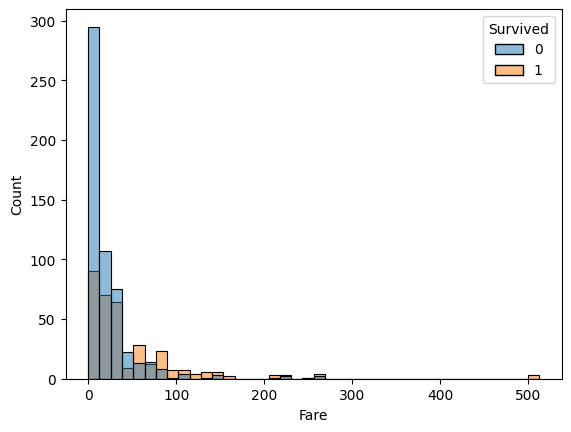

In [ ]:
sns.histplot(data=train_df, x='Fare', bins=40, hue='Survived')

Những người trả vé dưới 50 đô thì khả năng chết rất cao, những người trả về khoảng từ 60 đến 150 đô có tỉ lệ sống sót cao. Vé đắt nhất luôn là vé an toàn nhất vì không có người mất.

In [ ]:
train_df['Fare'].head()

PassengerId
1     7.2500
2    71.2833
3     7.9250
4    53.1000
5     8.0500
Name: Fare, dtype: float64

In [ ]:
# chia nhỏ các khoảng ra, chia 4 khoảng, 0-25%, 25-50, 50-75, 75-100
pd.qcut(train_df['Fare'], 4)

PassengerId
1       (-0.001, 7.91]
2      (31.0, 512.329]
3       (7.91, 14.454]
4      (31.0, 512.329]
5       (7.91, 14.454]
            ...       
887     (7.91, 14.454]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (14.454, 31.0]
891     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] <
                                           (31.0, 512.329]]

<Axes: xlabel='Fare', ylabel='count'>

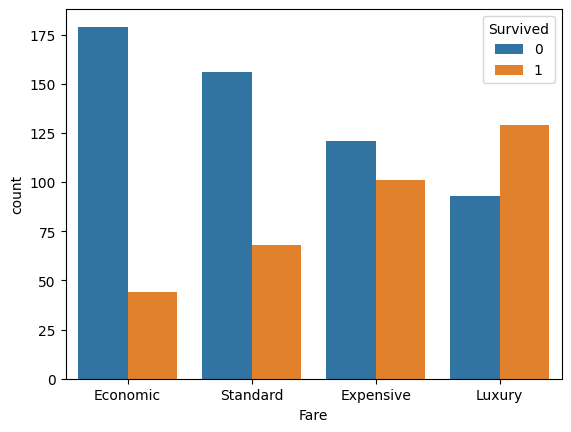

In [ ]:
fare_categories = ["Economic", "Standard", "Expensive", "Luxury"] # khoảng (-0.001, 7.91]: Economic
quartile_data = pd.qcut(train_df['Fare'], 4, labels=fare_categories)

sns.countplot(x=quartile_data, hue=train_df['Survived'])


Những người mua vé hạng Luxury và Expensive thì khả năng sống cao, còn lại thì khả năng sống sót rất ít.

# **3. Feature Engineering and Data Wrangling**

- Feature Engineering là biến dữ liệu thô thành dữ liệu tốt hơn
- Data Wrangling là sắp xếp dữ liệu từ dữ liệu thô thành dữ liệu sẵn sàng để phân tích (nhập dữ liệu, làm sạch dữ liệu, tạo ra cấu trúc dữ liệu)

### ** 3.1. Feature Engineering**

## Name

Regular Expression: mục đích là để lấy chữ Mr, Miss ra khỏi dấu phẩy (,), dấu cách và dấu chấm (.)

In [ ]:
train_df["Name"].tail(10)

PassengerId
882                          Markun, Mr. Johann
883                Dahlberg, Miss. Gerda Ulrika
884               Banfield, Mr. Frederick James
885                      Sutehall, Mr. Henry Jr
886        Rice, Mrs. William (Margaret Norton)
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [ ]:
import re #regular expression

## hàm dùng để lấy chữ Mr, Miss, Rev ra khỏi string tên
def extract_title(name):
  p = re.compile(r",([\w\s]+)\.")
  return p.search(name).groups(1)[0].strip()

train_df["Title"] = train_df['Name'].apply(lambda name: extract_title(name))

In [ ]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [ ]:
test_df["Title"] = test_df['Name'].apply(lambda name: extract_title(name))

In [ ]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

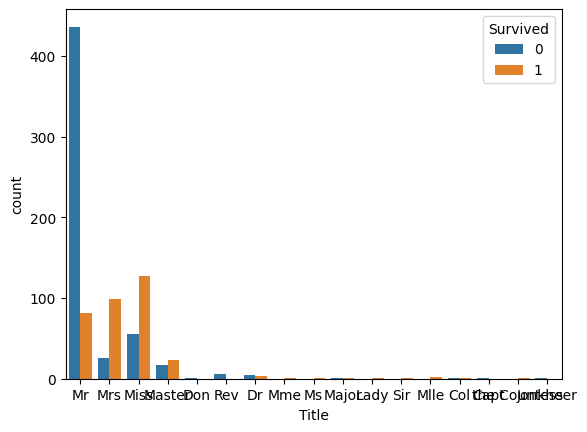

In [ ]:
sns.countplot(data=train_df, x='Title', hue='Survived')

Gom các title nhỏ nhỏ như Rev, Dr, Mme,.. thành 1 nhóm khác là nhóm "Others"

In [ ]:
def group_title(title):
  if title in ['Mr', 'Mrs', 'Miss', 'Master']:
    return title
  elif title == 'Ms':
    return "Miss"
  else:
    return "Others"

train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

<Axes: xlabel='Title', ylabel='count'>

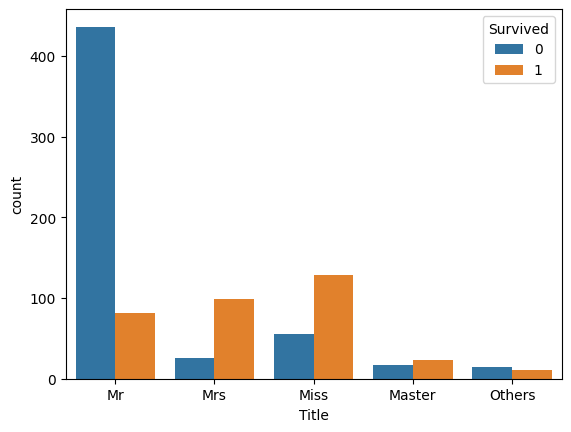

In [ ]:
sns.countplot(data = train_df, x='Title', hue='Survived')

Nhận thấy các Mrs, Miss thì khả năng sống sót cao, Master cũng vậy. Tuy nhiên, Mr và Others thì tỉ lệ chết nhiều. Sẽ là đặc trưng để đưa vào model.

## Family
- SibSp, Parch
- Cộng 2 nhóm SibSp và Parch lại thành một cột là Family_Size

In [ ]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1


In [ ]:
# chia Family_Size thành 4 nhóm, nhóm 1 người: 'Solo', nhóm 2 - 4: 'Small', nhóm 5 - 6: "Medium", nhóm 7 trở đi: 'Large'
train_df["Family_Cat"] = pd.cut(train_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large'])
# cách vận hành của bins là (0, 1], (1,4], (4,6], (6, 20]: chia thành các nửa đoạn

test_df["Family_Cat"] = pd.cut(test_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large'])


<Axes: xlabel='Family_Cat', ylabel='count'>

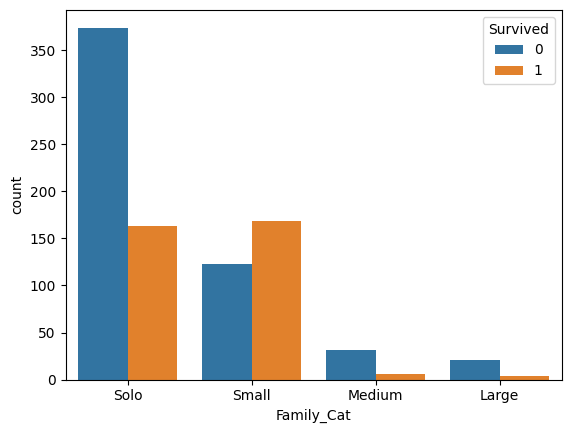

In [ ]:
sns.countplot(data=train_df, x='Family_Cat', hue='Survived')

Những người mà đi 1 mình (Solo) thì khả năng chết cao, còn đi với gia đình 2 đến 4 người thì khả năng sống sót cao (cột Small), còn những gia đình (Medium, Large) thì khả năng chết nhiều. Đây cũng là 1 đặc trưng để đưa vào mô hình

 ## **3.2. Data Wrangling**

In [ ]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title', 'Family_Size', 'Family_Cat'],
      dtype='object')

In [ ]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [ ]:
def display_missing(df, feature_cols):
  n_rows = df.shape[0]
  for col in feature_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
      print(f"The column {col} has {missing_count * 100/n_rows:.2f}% missing values.")

display_missing(train_df, feature_cols)
print("Test_df: ")
display_missing(test_df, feature_cols)


The column Age has 19.87% missing values.
The column Embarked has 0.22% missing values.
Test_df: 
The column Age has 20.57% missing values.
The column Fare has 0.24% missing values.


### Data Wrangling
#### Age
- Filling missing values with `median` of whole dataset

Tìm xem các cột nào trong dataset có liên quan đến cột `Age`. Từ đó sẽ fill những giá trị null bằng các giá trị median được groupby bởi cột đó.
Trong bài này sẽ group by cột `Age` theo cột `Sex` (nam và nữ có độ tuổi trung bình khác nhau) và `Pclass` (độ tuổi trung niên thường đi 1st class, tuổi trẻ thường đi hạng phổ thông)

In [ ]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age']

<ipython-input-42-3fa291a8b2d3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age']


In [ ]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [ ]:
# Filling the missing values in Age which the medians of Sex and Pclass groups

train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

<ipython-input-44-837191656f1a>:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))


In [ ]:
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

<ipython-input-45-b9d8d1bd60c9>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))


In [ ]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

The column Embarked has 0.22% missing values.
The column Fare has 0.24% missing values.


In [ ]:
X = train_df[feature_cols]
y = train_df['Survived']

In [ ]:
X_test = test_df[feature_cols]

In [ ]:
# preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

cat_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [ ]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [ ]:
X = preprocessor.transform(X) # X -> X_train, X_val

In [ ]:
X_test = preprocessor.transform(X_test)

# **4. Model_Training**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [ ]:
# binary classification
from sklearn.preprocessing import PolynomialFeatures

# sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
log_reg.score(X_val, y_val)

0.8435754189944135

In [ ]:
y_pred = log_reg.predict(X_val)

In [ ]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.8787878787878788, 0.7435897435897436)

In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       101
           1       0.88      0.74      0.81        78

    accuracy                           0.84       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.84      0.84       179



Nâng bậc của dữ liệu X lên thành bậc 2
y = a*x1 + b*x2 + bias -> y = a*x1^2 + b*x2^2 + c*x1*x2 + bias.
Cho nên dữ liệu sẽ có nhiều đặc trưng hơn.

Polynomial chỉ cho các mô hình linear (tuyến tính)

In [ ]:
poly = PolynomialFeatures(degree=5)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.transform(X_val)

In [ ]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
poly_log_reg.score(poly_features_X_val, y_val)

0.7877094972067039

In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)

In [ ]:
decision_tree.score(X_val, y_val)

0.8379888268156425

### 4.1. Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2023)

lr_scores = cross_val_score(log_reg_cv, X, y, scoring='accuracy', cv=5)

In [ ]:
lr_scores.mean(), lr_scores.std()

(0.826031008725127, 0.020466357172416235)

In [ ]:
dt_scores = cross_val_score(dt_cv, X, y, scoring='accuracy', cv=5)

In [ ]:
dt_scores.mean(), dt_scores.std()

(0.8148389931579938, 0.01240557058523914)

### 4.2. Baseline Model Comparison

Xem cách chọn model từ sklearn choose the right estimator

In [ ]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
seed = 2023
models = [
    LinearSVC(random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=12000),
    DecisionTreeClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)
]

In [ ]:
# hàm chạy qua từng model phía trên
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
  # define k-fold:
  kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
  entries = []
  for model in models:
    model_name = model.__class__.__name__ # mỗi tên trong models phía trên là một lớp nên gọi theo cách này
    scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
    for fold_idx, score in enumerate(scores): # enumerate() là hàm in ra giá trị index (mặc định = 0) và các giá trị trong iterable, iterable ở đây là biến scores
      entries.append((model_name, fold_idx, score))

  cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy_score'])

  # Vẽ biểu đồ
  if plot_results:
    sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
    plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
    plt.xticks(rotation=45) # xoay các tên của trục Ox
    plt.show()

  # mean - tạo dataframe mới
  # summary result
  mean = cv_df.groupby('model_name')['accuracy_score'].mean()
  std = cv_df.groupby('model_name')['accuracy_score'].std()

  baseline_results = pd.concat([mean, std], axis = 1, ignore_index=True)
  baseline_results.columns = ['Mean', 'Standard Deviation']

  #sort by accuracy
  baseline_results.sort_values(by=['Mean'], ascending=False, inplace=True)

  return baseline_results

generate_baseline_results(models, X_train, y_train, metrics='accuracy', cv=5, plot_results=False)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Mean,Standard Deviation
model_name,,
SVC,0.834256,0.020981
LinearSVC,0.828632,0.025751
LogisticRegression,0.825815,0.027125
AdaBoostClassifier,0.818802,0.025669
KNeighborsClassifier,0.808983,0.019594
XGBClassifier,0.807584,0.029105
ExtraTreesClassifier,0.773899,0.022676
DecisionTreeClassifier,0.769723,0.030167


Mô hình SVC cho ra kết quả tốt nhất

In [ ]:
selected_model = SVC(random_state=2023)
selected_model.fit(X_train, y_train)

SVC(random_state=2023)

In [ ]:
y_pred = selected_model.predict(X_test)